# **Final Exam (Remote)**
## ECE204 Data Science & Engineering

*This notebook uses `X` and `df` for multiple problems, and those variables could be mistakenly used for the wrong problem. To start fresh, restarting the kernel in the Kernel  menu or with the <span class="jp-RefreshIcon jp-Icon jp-Icon-16 jp-ToolbarButtonComponent-icon"></span> button above.*

*Another useful command "Kernel > Restart and run all" in the menu above. This clears all variables and runs the notebook top to bottom.*

Items 2-5 uses the `wine-quality.csv` dataset. Each row of this dataset corresponds to data about a different wine sample. The first 11 columns correspond to observations made by physiochemical tests on a wine sample (acidity level, density, sugar content, etc.). The 12th column is a rated quality score for the wine sample, on a 0-10 scale.

In [2]:
# Necessary imports (run this cell!)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Item 1: Rules & Honor Code
> **See Canvas.**

---
## Dataset manipulation and information summary

### Item 3 a)

In [7]:
### Starter code
df = pd.read_csv("wine-quality.csv")
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
### Your code here
df["residual sugar"].mean()

2.53880550343965

---
### Item 3 b)

In [12]:
### Starter code
df = pd.read_csv("wine-quality.csv")

### Your code here
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

---
### Item 3 c)

In [22]:
### Starter code
df = pd.read_csv("wine-quality.csv")

### Your code here
df1 = df.groupby('quality')

df1['alcohol'].mean()

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

---
### Item 3 d)

In [27]:
### Starter code
df = pd.read_csv("wine-quality.csv")

### Your code here
df2 = df.groupby('quality')

df1['pH'].mean()

quality
3    3.398000
4    3.381509
5    3.304949
6    3.318072
7    3.290754
8    3.267222
Name: pH, dtype: float64

---
## Unsupervised leaning

### Item 4

In [31]:
### Starter code
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("wine-quality.csv")

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']
X = df[features]

### Your code here
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
pca = PCA(n_components=0.95)
pca.fit(X_scaled)
pca.n_components_


9

---
## Supervised learning

### Item 5 a)

In [35]:
### Starter code
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("wine-quality.csv")

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']
labels = 'quality'

X = df[features]
y = df[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

### Your code here
dt = DecisionTreeClassifier(max_depth=5, random_state=12)
dt.fit(X_train, y_train)
dt.feature_importances_

array([0.028678  , 0.1071444 , 0.02178991, 0.02959076, 0.01048532,
       0.01770544, 0.13105678, 0.        , 0.02876334, 0.20474289,
       0.42004315])

---
### Item 5 b)

In [39]:
### Starter code
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("wine-quality.csv")

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']
labels = 'quality'

X = df[features]
y = df[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_new = [[12.0, 0.6, 0.7, 2.2, 0.074, 10.0, 47.0, 1.0, 3.25, 0.6, 9.0]]

### Your code here
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn.predict(X_new)




/Users/janeli/anaconda3/envs/bonding/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([3])

---
### Item 6 a)

In [47]:
### Starter code
from sklearn.linear_model import LinearRegression

df = pd.read_csv("wine-quality.csv")

X = df[['fixed acidity', 'residual sugar']]
y = df['pH']

# create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Your code here
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
print(model.score(X_train, y_train))

3.813959024718791
[-0.06042496  0.00025412]
0.45724793983222456


---
### Item 6 b)

In [54]:
### Starter code
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

df = pd.read_csv("wine-quality.csv")

X = df[['fixed acidity']]
y = df['pH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 50)

### Your code here
model = PolynomialFeatures(degree=2)
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test,y_pred)


0.01206391332110709

---
### Item 7 a)

This item uses a different dataset: `air_quality.csv`. Before starting, inspect the data carefully:

In [55]:
df = pd.read_csv('air_quality.csv', parse_dates=True, index_col=0).sort_index().asfreq(freq = 'H')
df.head()

/var/folders/gj/1nzwkx3x3rg1zwxj2mx5xkrm0000gn/T/ipykernel_95446/2445795387.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = pd.read_csv('air_quality.csv', parse_dates=True, index_col=0).sort_index().asfreq(freq = 'H')


,RADON_pCi/L,TEMP_F,HUMIDITY,PRESSURE_hPa,CO2_ppm,VOC_ppb,High_CO2
recorded,,,,,,,
2021-02-01 00:00:00,1.22,63.39,39.0,989,560,75.0,No
2021-02-01 01:00:00,1.19,62.67,38.5,989,548,91.0,No
2021-02-01 02:00:00,1.19,63.55,38.0,989,593,110.0,No
2021-02-01 03:00:00,1.22,63.07,37.5,989,573,110.0,No
2021-02-01 04:00:00,1.24,62.33,37.5,990,555,138.0,No


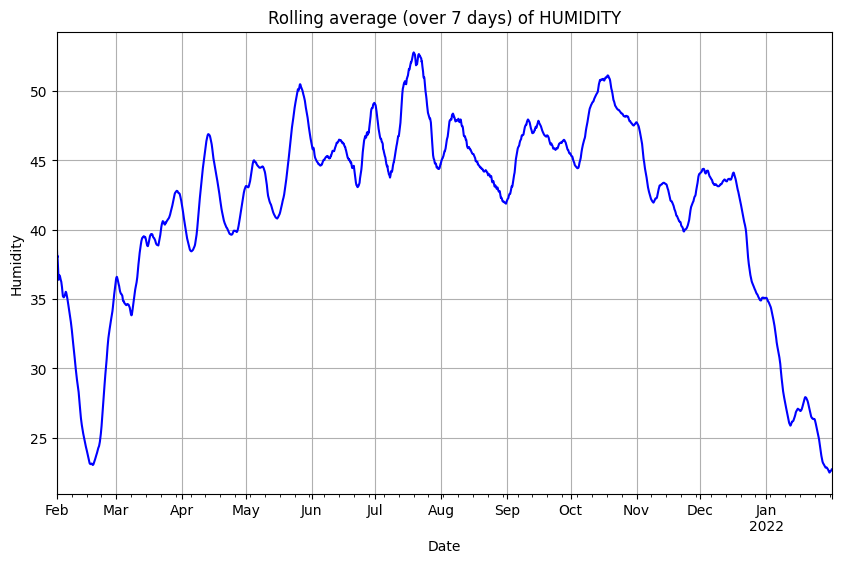

In [88]:
### Your code here
import matplotlib.pyplot as plt

rolling_avg_humidity = df.HUMIDITY.rolling("7d").mean()
ax = rolling_avg_humidity.plot(figsize=(10, 6), color='blue')

ax.set_title('Rolling average (over 7 days) of HUMIDITY')
ax.set_xlabel('Date')
ax.grid(True)
ax.set_ylabel('Humidity')

## You may finde the following lines of code helpful: 
fig = ax.get_figure()
fig.savefig("WuzhenLi.png")

---
### Item 7 b)


In [78]:
### Starter code
from statsmodels.tsa.ar_model import AutoReg

df = pd.read_csv('air_quality.csv', parse_dates=True, index_col=0).sort_index().asfreq(freq = 'H')

#train/test splits
end_train = '2022-1-30 23:00'
begin_test = '2022-1-31 00:00'
end_test = '2022-1-31 23:00' #Last timestamp in the series

df_train = df.loc[:end_train, ['RADON_pCi/L']]
df_test = df.loc[begin_test:, ['RADON_pCi/L']].copy()

### Your code

model = AutoReg(df_train, lags=100)
model = model.fit()
time = '2022-01-31 10:00:00'
model.predict(start=time, end=time)




Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/gj/1nzwkx3x3rg1zwxj2mx5xkrm0000gn/T/ipykernel_95446/3264789675.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = pd.read_csv('air_quality.csv', parse_dates=True, index_col=0).sort_index().asfreq(freq = 'H')


2022-01-31 10:00:00    1.378586
Freq: h, dtype: float64

### Do not forget to upload your Jupyter notebook!